In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import hdbscan
import seaborn as sns
sns.set_style("dark")

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pd.set_option("display.max_columns",1000)

# Load _All_ Data

In [3]:
all_data = pd.DataFrame()
for yr in range(1996,2014):
    data = pd.read_csv('data/college-scorecard-raw-data-030216/merged_'+str(yr)+'_PP.csv', encoding='iso-8859-1',
                       na_values="PrivacySuppressed")
    data['year'] = yr
    all_data = pd.concat((all_data,data))
all_data.info()

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Columns: 1730 entries, UNITID to year
dtypes: float64(1713), int64(7), object(10)
memory usage: 1.6+ GB


In [4]:
all_data.set_index('UNITID', inplace=True)
yearly = all_data.groupby("year")

In [5]:
filled = yearly.get_group(2013)
for yr in range(2012,1995,-1):
    df = yearly.get_group(yr)
    filled = filled.combine_first(df)
filled = filled[filled.index.isin(yearly.get_group(2013).index)]
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7804 entries, 100654 to 48285707
Columns: 1729 entries, OPEID to year
dtypes: float64(1719), object(10)
memory usage: 103.0+ MB


<IPython.core.display.Javascript object>


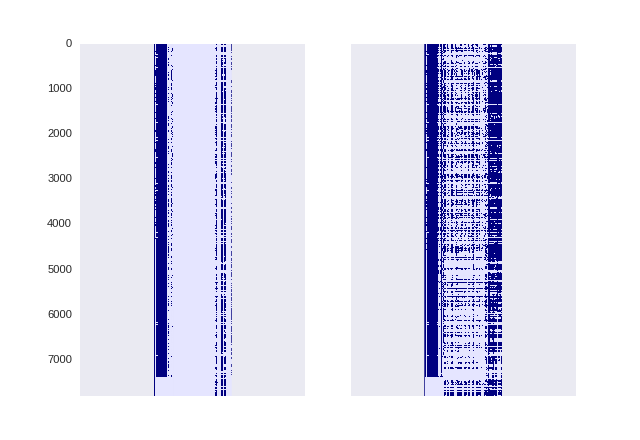

In [6]:
f, axarr = plt.subplots(1, 2, sharey=True)
for i,df in enumerate([yearly.get_group(2013),filled]):
    nans = ~pd.isnull(df)
    im = axarr[i].imshow(nans.values, cmap=sns.light_palette("navy", as_cmap=True), interpolation='none')
    plt.setp(axarr[i].get_xticklabels(), visible=False)

<IPython.core.display.Javascript object>


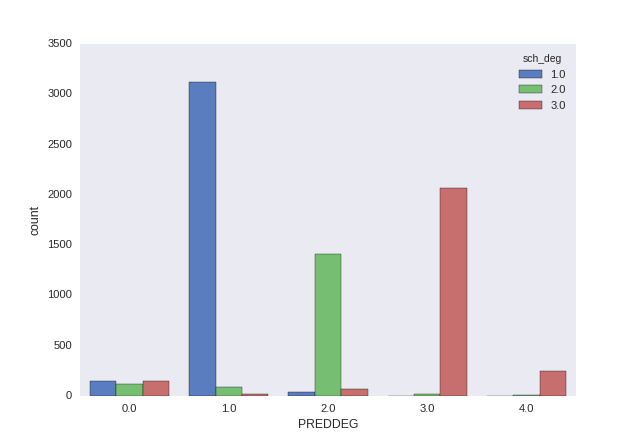

In [7]:
f,ax = plt.subplots()
ax = sns.countplot(x="PREDDEG", hue="sch_deg", data=filled, palette="muted")
f.savefig('plots/degree_classification.png', bbox_inches='tight')

In [8]:
bachelors = filled[filled.sch_deg == 3]
bachelors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560 entries, 100654 to 47702003
Columns: 1729 entries, OPEID to year
dtypes: float64(1719), object(10)
memory usage: 33.8+ MB


<IPython.core.display.Javascript object>


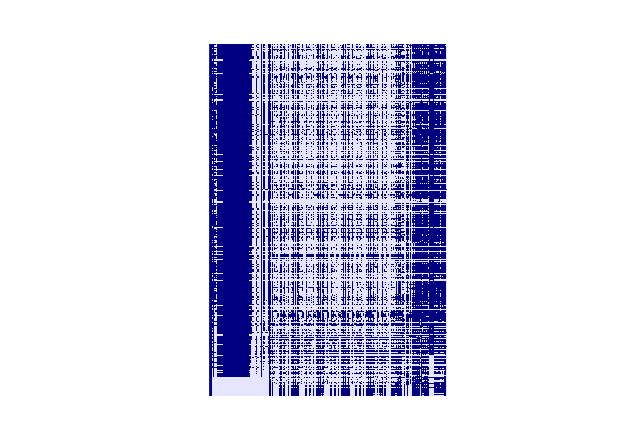

[None, None, None, None, None, None, None, None]

In [9]:
f, ax = plt.subplots(1)
nans = ~pd.isnull(bachelors)
im = ax.imshow(nans.values, cmap=sns.light_palette("navy", as_cmap=True), interpolation='none')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)